# Proyecto 1 — CNN (CIFAR-10)

In [9]:
import sys
sys.path.append('../src')

from data import FashionMNISTData
from models import create_cnn_model, create_simple_cnn_model, compile_model
from train import FashionMNISTTrainer
from utils import (print_welcome_message, print_completion_message, 
                   save_training_results, save_summary_csv, plot_training_history,
                   plot_confusion_matrix, plot_examples, calculate_metrics,
                   plot_sample_images)

# Configuración específica del notebook
NOTEBOOK_NAME = "1_cnn_classification"
MODEL_NAME = "fashion_mnist_cnn_baseline"
print_welcome_message(f"Fashion-MNIST {MODEL_NAME}")
print(f"Notebook: {NOTEBOOK_NAME}")

PROYECTO FASHION-MNIST FASHION_MNIST_CNN_BASELINE
Silvia Sandoval - Portfolio Machine Learning
Notebook: 1_cnn_classification



1. Cargando datos...
Cargando dataset Fashion-MNIST...
Datos cargados:
X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)
Clases: ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']
Directorio creado: ../results/1_cnn_classification


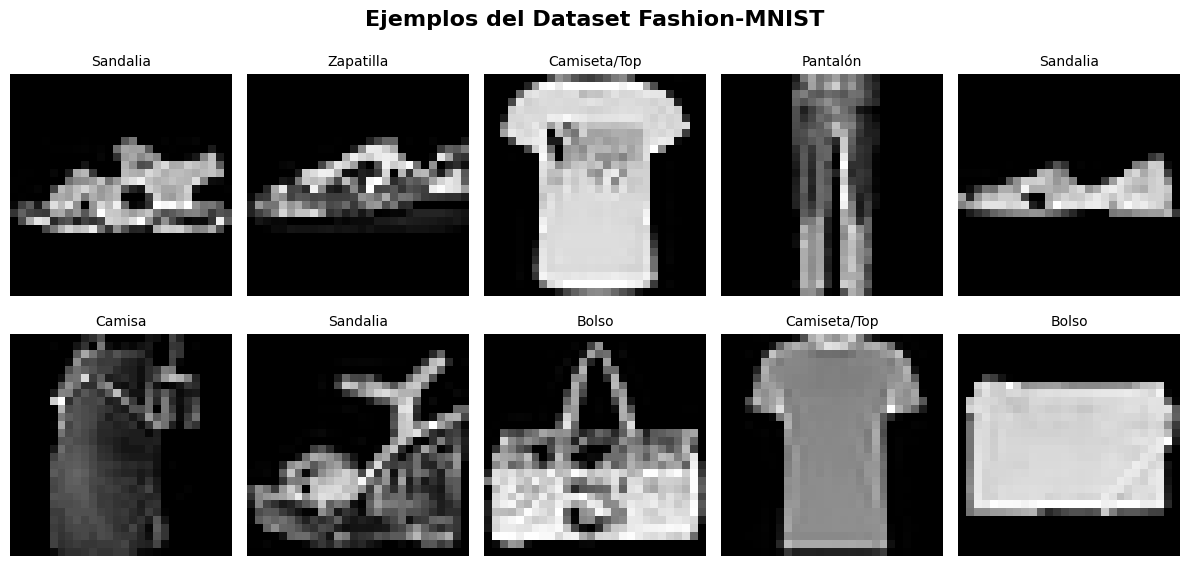

Ejemplos del dataset guardados en: ../results/1_cnn_classification/dataset_samples.png


In [10]:
# 1. Cargar datos
print("\n1. Cargando datos...")
data_loader = FashionMNISTData()
x_train, y_train, x_test, y_test = data_loader.load_data()
class_names = data_loader.get_class_names()

# Mostrar ejemplos del dataset
plot_sample_images(data_loader, NOTEBOOK_NAME)

In [11]:
# 2. Crear modelo
print("\n2. Creando modelo...")
model = create_cnn_model()
model = compile_model(model)
model.summary()


2. Creando modelo...


c:\Users\seneyda\Downloads\ml-portfolio-2025\ml-portfolio-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470,122 (1.79 MB)

 Trainable params: 469,162 (1.79 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
# 3. Entrenar modelo
print("\n3. Entrenando modelo...")
trainer = FashionMNISTTrainer(model, MODEL_NAME)
history = trainer.train_model(x_train, y_train, x_test, y_test, epochs=10)


3. Entrenando modelo...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6526 - loss: 1.0128
Epoch 1: val_accuracy improved from None to 0.85650, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 104s 106ms/step - accuracy: 0.7539 - loss: 0.6797 - val_accuracy: 0.8565 - val_loss: 0.3801 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8509 - loss: 0.4172
Epoch 2: val_accuracy improved from 0.85650 to 0.88820, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.8577 - loss: 0.3950 - val_accuracy: 0.8882 - val_loss: 0.3040 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8754 - loss: 0.3438
Epoch 3: val_accuracy did not improve from 0.88820
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 130ms/step - accuracy: 0.8797 - loss: 0.3307 - val_accuracy: 0.8767 - val_loss: 0.3356 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8897 - loss: 0.3063
Epoch 4: val_accuracy improved from 0.88820 to 0.89490, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 110s 118ms/step - accuracy: 0.8919 - loss: 0.2991 - val_accuracy: 0.8949 - val_loss: 0.2820 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8984 - loss: 0.2789
Epoch 5: val_accuracy improved from 0.89490 to 0.90970, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 134s 143ms/step - accuracy: 0.8993 - loss: 0.2758 - val_accuracy: 0.9097 - val_loss: 0.2488 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9074 - loss: 0.2566
Epoch 6: val_accuracy did not improve from 0.90970
938/938 ━━━━━━━━━━━━━━━━━━━━ 135s 135ms/step - accuracy: 0.9072 - loss: 0.2580 - val_accuracy: 0.9096 - val_loss: 0.2433 - learning_rate: 0.0010
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9090 - loss: 0.2489
Epoch 7: val_accuracy improved from 0.90970 to 0.91050, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 151s 161ms/step - accuracy: 0.9110 - loss: 0.2471 - val_accuracy: 0.9105 - val_loss: 0.2394 - learning_rate: 0.0010
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9155 - loss: 0.2336
Epoch 8: val_accuracy improved from 0.91050 to 0.92340, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 119s 127ms/step - accuracy: 0.9139 - loss: 0.2373 - val_accuracy: 0.9234 - val_loss: 0.2095 - learning_rate: 0.0010
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9200 - loss: 0.2217
Epoch 9: val_accuracy improved from 0.92340 to 0.92360, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 117s 125ms/step - accuracy: 0.9195 - loss: 0.2245 - val_accuracy: 0.9236 - val_loss: 0.2076 - learning_rate: 0.0010
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9220 - loss: 0.2174
Epoch 10: val_accuracy did not improve from 0.92360
938/938 ━━━━━━━━━━━━━━━━━━━━ 111s 119ms/step - accuracy: 0.9207 - loss: 0.2209 - val_accuracy: 0.9219 - val_loss: 0.2128 - learning_rate: 0.0010
Tiempo de entrenamiento: 1242.51 segundos


In [13]:
# 4. Evaluar modelo
print("\n4. Evaluando modelo...")
test_loss, test_accuracy = trainer.evaluate_model(x_test, y_test)


4. Evaluando modelo...
Precisión en test: 0.9219
Pérdida en test: 0.2128


In [14]:
# 5. Calcular métricas adicionales
print("\n5. Calculando métricas...")
y_true, y_pred, f1, report = calculate_metrics(model, x_test, y_test, class_names)


5. Calculando métricas...

MÉTRICAS DETALLADAS
F1 Score (weighted): 0.9220
Accuracy: 0.9219

Reporte por clase:
              precision    recall  f1-score   support

Camiseta/Top       0.90      0.85      0.87      1000
    Pantalón       1.00      0.98      0.99      1000
      Suéter       0.88      0.91      0.89      1000
     Vestido       0.89      0.95      0.92      1000
      Abrigo       0.91      0.85      0.88      1000
    Sandalia       0.99      0.97      0.98      1000
      Camisa       0.77      0.79      0.78      1000
   Zapatilla       0.92      0.99      0.95      1000
       Bolso       0.99      0.98      0.99      1000
       Botín       0.99      0.93      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [15]:
# 6. Guardar modelo y resultados
print("\n6. Guardando resultados...")
trainer.save_model(NOTEBOOK_NAME)
# Obtener métricas adicionales
training_time = trainer.get_training_time()
model_params = trainer.get_model_params()

# Guardar resultados
results = save_training_results(
    history, test_accuracy, test_loss, f1, 
    MODEL_NAME, NOTEBOOK_NAME, training_time, model_params
)

# Actualizar summary general
save_summary_csv(results, NOTEBOOK_NAME)



6. Guardando resultados...
Modelo guardado en: ../results/1_cnn_classification/fashion_mnist_cnn_baseline_model.h5
Resultados guardados en: ../results/1_cnn_classification/training_results.json
Métricas añadidas al summary general: ../results/summary.csv



7. Generando visualizaciones...


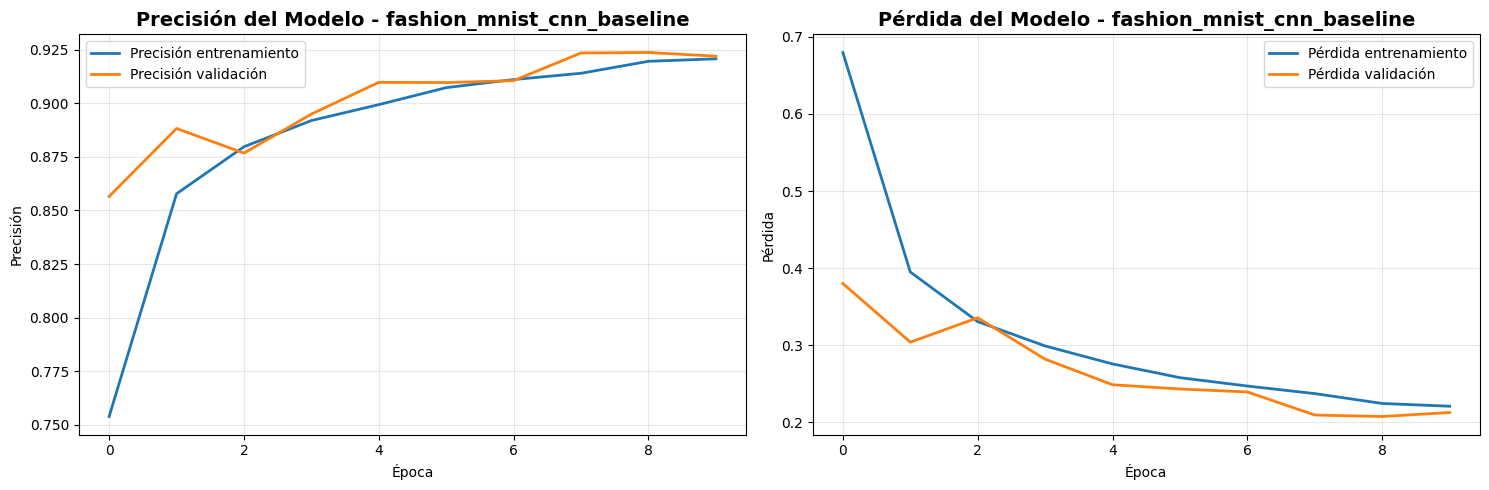

Curvas de aprendizaje guardadas en: ../results/1_cnn_classification/learning_curves.png


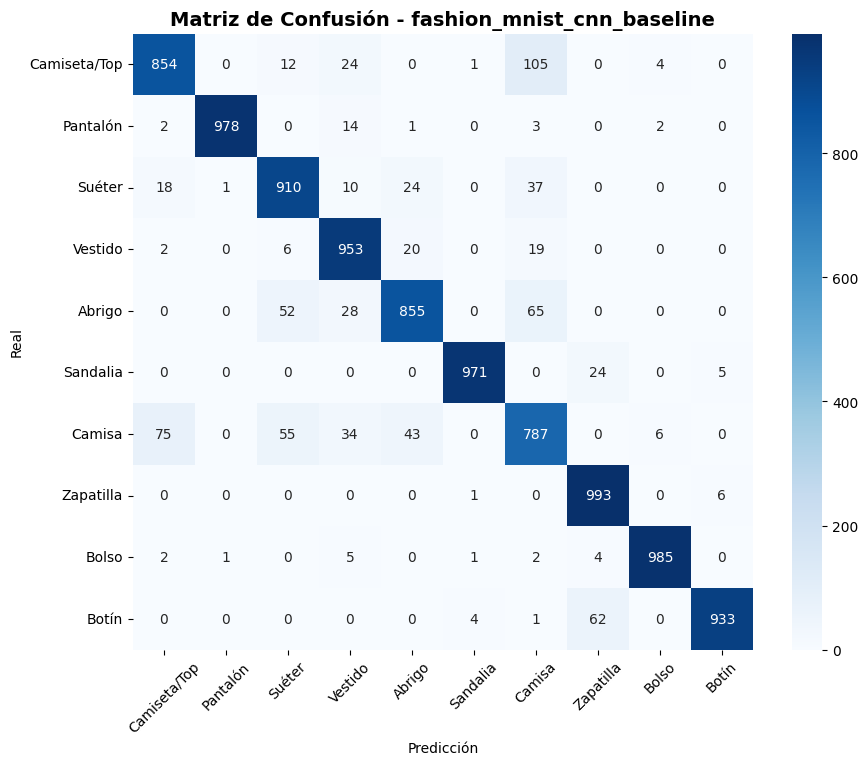

Matriz de confusión guardada en: ../results/1_cnn_classification/confusion_matrix.png


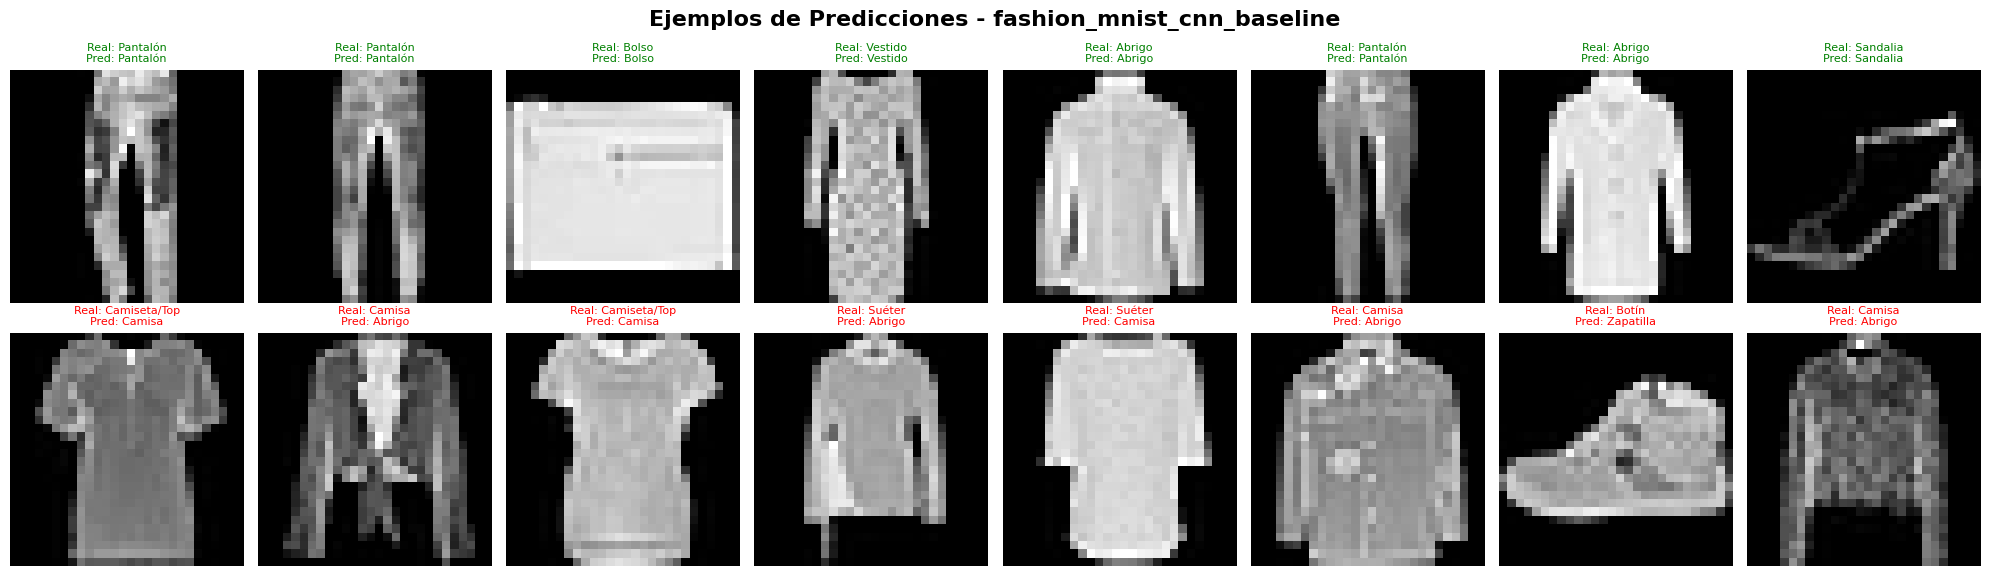

Ejemplos de predicciones guardados en: ../results/1_cnn_classification/prediction_examples.png
Modelo entrenado y evaluado correctamente

RESUMEN FINAL DEL MODELO
Modelo: fashion_mnist_cnn_baseline
Accuracy: 0.9219
F1 Score: 0.9220
Pérdida: 0.2128
Tiempo de entrenamiento: 1242.51 segundos
Parámetros del modelo: 470,122


In [16]:
# 7. Visualizaciones
print("\n7. Generando visualizaciones...")
plot_training_history(history, NOTEBOOK_NAME, MODEL_NAME)
plot_confusion_matrix(y_true, y_pred, class_names, NOTEBOOK_NAME, MODEL_NAME)
plot_examples(model, x_test, y_test, class_names, NOTEBOOK_NAME, MODEL_NAME, num_examples=8)

print_completion_message()

# Mostrar resumen final
print("\n" + "="*60)
print("RESUMEN FINAL DEL MODELO")
print("="*60)
print(f"Modelo: {MODEL_NAME}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Pérdida: {test_loss:.4f}")
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Parámetros del modelo: {model_params:,}")
print("="*60)